# Next word predition

**Project outline**
Next word prediction NLP models are used to predict the most likely next word or sequence of words given in a context or output. Here, we are trying to build a tensorflow model and use recurrent neural network modelling design to build a model that can take in 3 words to predict the fourth word. The text corpus has been taken from the novel Pride and Prejudice from the Project Gutenberg (https://www.gutenberg.org/ebooks/1342)<br><br>


**Method**
While RNN is used to build the structure of the model, it is complemented by the power of LSTM, which can help in prediction of the next word depending on the words preceeding the input words (long term dependencies).

So firstly, the textual data is cleaned and converted into squence of numbers for it to be evaluated by the model

Then, the data is split for training and testing. A  sequential neural network model is created for sequential data processing and multi-class classification tasks, with 6 layers- 1 input layer, 1 embedding layer, 2 LSTM and 2 dense layers

After building this model, the model is fitted after tuning it for callbacks and evaluation metrics.

Then this model is used for prediction of next word when a user inputs a sequence of three words. <br><br>


**Evaluation**
Evalution is doen by looking the validation accuracy level and comparing the training and validation loss, which will help in understading if the model is under or overfitting.

Validation accuracy is used as evalution metrics as it geives us better sense into how the model will perform with unknown dataset.

*Source inspiration:* IG Tech Team by Ishwar Gautam

#Libraries

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Utility functions from TF
import tensorflow as tf
import keras
import keras.utils
from keras import layers
from keras import losses
from keras import utils

#from tensorflow.keras import preprocessing
from keras.utils import pad_sequences

# Some Keras utility functions and sequential layers
from keras.preprocessing.text import Tokenizer

#from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
#from keras.preprocessing.sequence import pad_sequences
from keras.layers import  Bidirectional, Dropout
import pickle
import numpy as np
import os
import re

In [ ]:
#importing the file. Upload the downloaded text file that is provided with this notebook
from google.colab import files
uploaded = files.upload()

Saving Gutenberg_Pride&Prejudice.txt to Gutenberg_Pride&Prejudice.txt


In [ ]:
#reading the file
file = open("Gutenberg_Pride&Prejudice.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)


#Cleaning the text
The text is cleaned for large whitespaces, unusual symbols and digits. The text won't be treated for lower case to keep the meaning of some Noun like names of person and place to be uniquwly identified.

In [ ]:
#replace all newline character, carriage return character, Unicode character and quotation marks with empty string
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')

def remove_symbols(string):
    # Define the pattern to match symbols and special characters
    pattern = r"(?<![A-Za-z0-9])-|-(?![A-Za-z0-9])|[^-\w\s*()\[\]_:;]"

    # Use regex to replace the matched pattern with an empty string
    cleaned_string = re.sub(pattern, "", string)

    return cleaned_string

In [ ]:
remove_symbols(data)
#splits the string at each occurrence of whitespace characters and the joins them back.
#This essentially helps in removing extra whitespace and collapses multiple consecutive whitespace characters into a single space
data = data.split()
data = ' '.join(data)
data[:1000]

'The Project Gutenberg eBook of Pride and Prejudice This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook. Title: Pride and Prejudice Author: Jane Austen Release date: June 1, 1998 [eBook #1342] Most recently updated: April 14, 2023 Language: English Credits: Chuck Greif and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images available at The Internet Archive) *** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE *** [Illustration: GEORGE ALLEN PUBLISHER 156 CHARING CROSS ROAD LONDON RUSKIN HOUSE ] [Illustration: _Reading Jane’s Letters._ _Chap 34._ ]

In [ ]:
#using tokenizer from tensorflow to tokenize the words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function in a pickle file for reusability purpose
pickle.dump(tokenizer, open('token.pkl', 'wb'))

#converting the input text data into a sequence of integers
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]
len(sequence_data)
vocab_size = len(tokenizer.word_index) + 1 #obtaning the unique vocabulary size for the tokenizer
print(vocab_size)
sequences = [] #list will be used to store sequences of integers representing texts or sentences

#the loop takes the sequence_data list and creates sequences of four consecutive integers from it.
#These sequences are then appended to the sequences list
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

#creating empty list for X and y that will store input features and corresponding labels
X = []
y = []
for i in sequences:
    X.append(i[0:3]) # extract the first three elements of each sequence
    y.append(i[3]) # fourth element of each sequence

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])
y = to_categorical(y, num_classes=vocab_size)
y[:5]

7254
The Length of sequences are:  131175
Data:  [[   1  181  390]
 [ 181  390 1000]
 [ 390 1000    3]
 [1000    3  298]
 [   3  298    4]
 [ 298    4  946]
 [   4  946   41]
 [ 946   41 1000]
 [  41 1000   23]
 [1000   23   21]]
Response:  [1000    3  298    4  946   41 1000   23   21    1]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#Model Building

In [ ]:
#splitting the dataset into X and y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

## Creating the layers of Neural Network

1. Here we haven input layer followed by an embdding layer that converts input tokens into dense vectors of vocab size 10. <br>

2. Next is a bidirectional LSTM layer, that process input both forward and backward directions, allowing the model to capture context from both past and future information <br>

3. Then we have a LSTM layer, which help in capturing long term dependencies in sequential data, to retain information over longer sequences. <br>

4. Lastly, there are two dense layers, that allows for complex and expressive mapping between the LSTM layer's outputs and the final prediction. Each dense layer applies a linear transformation followed by a non-linear activation function to the inputs, enabling the model to learn intricate patterns and relationships in the data. <br>

The purpose of having two LSTM and dense layers builds the potential of the model to capture and learn more complex relationships and improve model's overall performance.




In [ ]:
# creating sequential neural network model for sequential data processing and multi-class classification tasks

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3)) #embedding layer
model.add(Bidirectional(LSTM(1000, return_sequences=True))) #processes the input sequence in both forward and backward directions, capturing information from both past and future contexts
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu")) #fully connected dense layer to the model.
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             72540     
                                                                 
 bidirectional (Bidirection  (None, 3, 2000)           8088000   
 al)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 1000)              12004000  
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7254)              7261254   
                                                                 
Total params: 28426794 (108.44 MB)
Trainable params: 28426794 (108.44 MB)
Non-trainable params: 0 (0.00 Byte)
____________

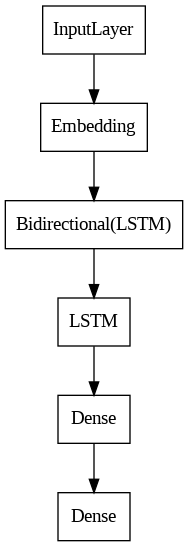

In [ ]:
#Diagramatic representation of the layers
from tensorflow import keras
keras.utils.plot_model(model, to_file='plot.png', show_layer_names=False)


## About modeling
After setting up the layers of neural network, the model is engineered on how to train or fit the model on the training and testing dataset.

For this, the concept of callback is used to optimise the training process. Two callback functions are used, Early stopping and Model Checkpoint.

The **EarlyStopping** callback monitors the validation loss (how well the model fits new data) and stops training if the loss doesn't improve for a specified number of epochs.

The **ModelCheckpoint** callback saves the best model weights based on the training loss. The model is compiled with the categorical cross-entropy loss, Adam optimizer, and accuracy metric.



In [ ]:
#fitting the model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) #stops the training process early if a monitored metric stops improving
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True) #display verbose output, and save only the best model weights based on the training loss
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics = ['accuracy']) #compiles the model

#fitting the model
history = model.fit(X_train, Y_train, epochs = 30, batch_size=64, verbose = 1, validation_data =(X_test, Y_test),callbacks=[checkpoint])

Epoch 1/30
1640/1640 [==============================] - ETA: 0s - loss: 6.2259 - accuracy: 0.0584
Epoch 1: loss improved from inf to 6.22589, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1640/1640 [==============================] - 86s 43ms/step - loss: 6.2259 - accuracy: 0.0584 - val_loss: 5.8303 - val_accuracy: 0.0895
Epoch 2/30
1640/1640 [==============================] - ETA: 0s - loss: 5.5747 - accuracy: 0.1063
Epoch 2: loss improved from 6.22589 to 5.57469, saving model to next_words.h5
1640/1640 [==============================] - 65s 39ms/step - loss: 5.5747 - accuracy: 0.1063 - val_loss: 5.6113 - val_accuracy: 0.1148
Epoch 3/30
1640/1640 [==============================] - ETA: 0s - loss: 5.2299 - accuracy: 0.1239
Epoch 3: loss improved from 5.57469 to 5.22990, saving model to next_words.h5
1640/1640 [==============================] - 59s 36ms/step - loss: 5.2299 - accuracy: 0.1239 - val_loss: 5.5545 - val_accuracy: 0.1229
Epoch 4/30
1640/1640 [==============================] - ETA: 0s - loss: 4.9727 - accuracy: 0.1400
Epoch 4: loss improved from 5.22990 to 4.97265, saving model to next_words.h5
1640/1640 [==============================] - 65s 40ms/step - loss: 

## Output Interpretation

1. After 30 epochs, the validation accuracy (model perfomance in an unseen data) is 10.20%
2. The model is overfitting since, the validation loss is greater than the training loss

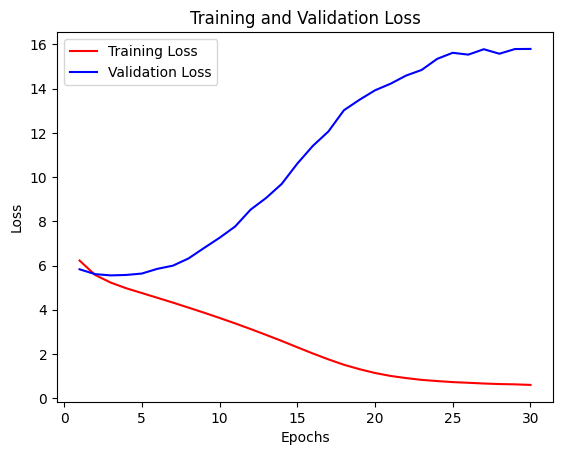

In [ ]:
import matplotlib.pyplot as plt

# Access the loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and validation loss curves
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction
Here, the model is put to test by predicitng the next word from the novel. You can try to type three words from the novel and see if it can predict the next word.
Some example sentences:
1. *But this word*
2. *Mr. Collins could*
3. *proceed from the*

To predict a function is created that takes in the model, tokenizer and the text (user input), which first tokenizes the input text into integers and then converts it into array (suitable for the model's input).

Then the array is then passed though the model for prediction and is stored empty string of predicted words.

Then another 'for' loop iterates over the word_index attribute of the tokenizer to find the word corresponding to the predicted index. Once found, the word is assigned to the predicted_word variable

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

#creating a function to predict next word by taking the user input, processing it fit the model and printing the predicted word
def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

  predict_again = input("Do you want to predict again? (yes/no): ")
  if predict_again.lower() == "no":
        print("Execution completed.....")
        break

['But', 'this', 'word']
1/1 [==============================] - 1s 979ms/step
cynical
['yes']
1/1 [==============================] - 1s 946ms/step
but
['yes']
1/1 [==============================] - 0s 20ms/step
but
['yes']
1/1 [==============================] - 0s 20ms/step
but
['yes']
1/1 [==============================] - 0s 32ms/step
but
['yes']
1/1 [==============================] - 0s 25ms/step
but
['Mr.', 'Collins', 'could']
1/1 [==============================] - 0s 28ms/step
be
['But', 'this', 'word']
1/1 [==============================] - 0s 19ms/step
cynical
['But', 'this', 'word']
1/1 [==============================] - 0s 27ms/step
cynical
['Proceed', 'from', 'the']
1/1 [==============================] - 0s 18ms/step
difficulty
